In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
netflix_data=pd.read_csv('netflix.csv')
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [94]:
netflix_data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [95]:
netflix_data.shape

(8807, 12)

In [96]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [97]:
# categorical columns
categorifal_column=['type','cast','country','rating','listed_in']

for col in categorifal_column:
    netflix_data[col]=netflix_data[col].astype('category')

netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       8807 non-null   object  
 1   type          8807 non-null   category
 2   title         8807 non-null   object  
 3   director      6173 non-null   object  
 4   cast          7982 non-null   category
 5   country       7976 non-null   category
 6   date_added    8797 non-null   object  
 7   release_year  8807 non-null   int64   
 8   rating        8803 non-null   category
 9   duration      8804 non-null   object  
 10  listed_in     8807 non-null   category
 11  description   8807 non-null   object  
dtypes: category(5), int64(1), object(6)
memory usage: 911.7+ KB


In [98]:
# converting date column
netflix_data['date_added']=pd.to_datetime(netflix_data['date_added'],errors='coerce')
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   category      
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   category      
 5   country       7976 non-null   category      
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   category      
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   category      
 11  description   8807 non-null   object        
dtypes: category(5), datetime64[ns](1), int64(1), object(5)
memory usage: 911.7+ KB


In [99]:
# Missing value detection
is_null_data=netflix_data.isnull().sum()
is_null_data.sort_values(ascending=False)


director        2634
country          831
cast             825
date_added        98
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [101]:
# Filling non value for director
netflix_data['director'].fillna('unknown',inplace=True)
netflix_data['director']

0       Kirsten Johnson
1               unknown
2       Julien Leclercq
3               unknown
4               unknown
             ...       
8802      David Fincher
8803            unknown
8804    Ruben Fleischer
8805       Peter Hewitt
8806        Mozez Singh
Name: director, Length: 8807, dtype: object

In [102]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   category      
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          7982 non-null   category      
 5   country       7976 non-null   category      
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   category      
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   category      
 11  description   8807 non-null   object        
dtypes: category(5), datetime64[ns](1), int64(1), object(5)
memory usage: 911.7+ KB


In [103]:
netflix_data['country'].head()

0    United States
1     South Africa
2              NaN
3              NaN
4            India
Name: country, dtype: category
Categories (748, object): [', France, Algeria', ', South Korea', 'Argentina', 'Argentina, Brazil, France, Poland, Germany, D..., ..., 'Venezuela, Colombia', 'Vietnam', 'West Germany', 'Zimbabwe']

In [104]:
netflix_data['country']=(netflix_data['country'].cat.add_categories('Not available')).fillna('Not available')

In [106]:
netflix_data['country'].value_counts()

country
United States                                                                          2818
India                                                                                   972
Not available                                                                           831
United Kingdom                                                                          419
Japan                                                                                   245
                                                                                       ... 
Ireland, Canada, Luxembourg, United States, United Kingdom, Philippines, India            1
Ireland, Canada, United Kingdom, United States                                            1
Ireland, Canada, United States, United Kingdom                                            1
Ireland, France, Iceland, United States, Mexico, Belgium, United Kingdom, Hong Kong       1
Norway, Germany                                                         

In [107]:
netflix_data['cast']=(netflix_data['cast'].cat.add_categories('Not available')).fillna('Not available')
netflix_data['cast'].value_counts()

cast
Not available                                                                                                                                                                                                                                          825
David Attenborough                                                                                                                                                                                                                                      19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                                                                                 14
Samuel West                                                                                                                                                                                                                                       

In [108]:
# statistics
netflix_data.describe()

,date_added,release_year
count,8709,8807.000000
mean,2019-05-23 01:45:29.452290816,2014.180198
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-20 00:00:00,2013.000000
50%,2019-07-12 00:00:00,2017.000000
75%,2020-08-26 00:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.819312


In [109]:
netflix_data.describe(include='category')

,type,cast,country,rating,listed_in
count,8807,8807,8807,8803,8807
unique,2,7693,749,17,514
top,Movie,Not available,United States,TV-MA,"Dramas, International Movies"
freq,6131,825,2818,3207,362


In [111]:
# Non-Graphical Analysis: Value counts and unique attributes
# Value Counts Analysis (Key Columns)
netflix_data['type'].value_counts(ascending=False)
# Business Insight:
# Netflix is movie-heavy, but TV shows drive long-term user engagement.

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Rating Distribution (rating)

In [118]:
netflix_data['rating'].value_counts(ascending=False)

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
UR             3
NC-17          3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

Insight:

Strong focus on mature and teen audiences

Family/kids content is comparatively less

Country-wise Content (country)

In [119]:
netflix_data['country'].value_counts(ascending=False)

country
United States                                                                          2818
India                                                                                   972
Not available                                                                           831
United Kingdom                                                                          419
Japan                                                                                   245
                                                                                       ... 
Ireland, Canada, Luxembourg, United States, United Kingdom, Philippines, India            1
Ireland, Canada, United Kingdom, United States                                            1
Ireland, Canada, United States, United Kingdom                                            1
Ireland, France, Iceland, United States, Mexico, Belgium, United Kingdom, Hong Kong       1
Norway, Germany                                                         

Heavy dependency on US content

India is one of the top international contributors

Opportunity for regional expansion

Release Year (release_year)

In [120]:
netflix_data['release_year'].value_counts(ascending=False)

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64

Generes (listed in)

In [121]:
netflix_data['listed_in'].value_counts(ascending=False).head(5)

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Name: count, dtype: int64

Insight 

Drama dominates across regions

Documentaries are a strong niche growth area



Visual Analysis - Univariate, Bivariate after pre-processing of the data


UNIVARIATE ANALYSIS (Seaborn)

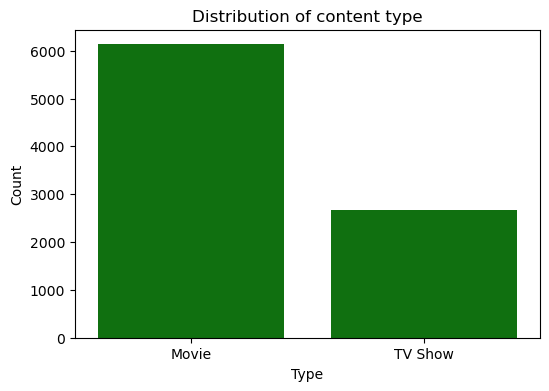

In [ ]:

fig=plt.figure(figsize=(6,4))
sns.countplot(data=netflix_data,x='type',color='green')
plt.title('Distribution of content type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

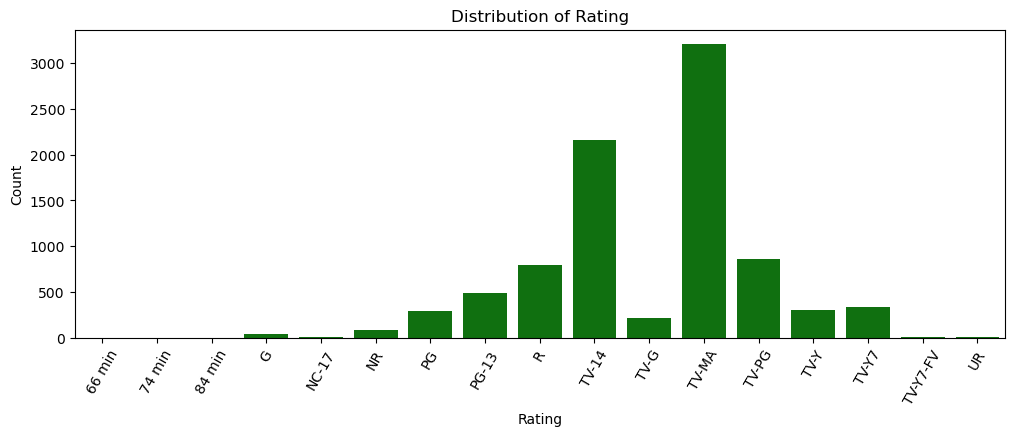

In [138]:
fig=plt.figure(figsize=(12,4))
sns.countplot(data=netflix_data,x='rating',
              color='green')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.xticks(rotation=60)
plt.ylabel('Count')
plt.show()

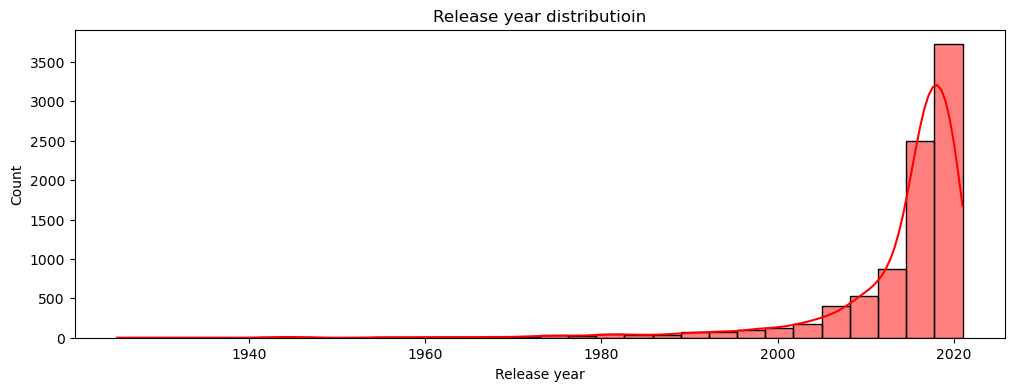

In [142]:
fig=plt.figure(figsize=(12,4))
sns.histplot(data=netflix_data['release_year'],bins=30,kde=True,
              color='red')
plt.title('Release year distributioin')
plt.xlabel('Release year')
plt.show()

Top 10 Genres

In [155]:
top_10_genres=netflix_data['listed_in'].value_counts(ascending=False).head(5)
top_10_genres

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Name: count, dtype: int64

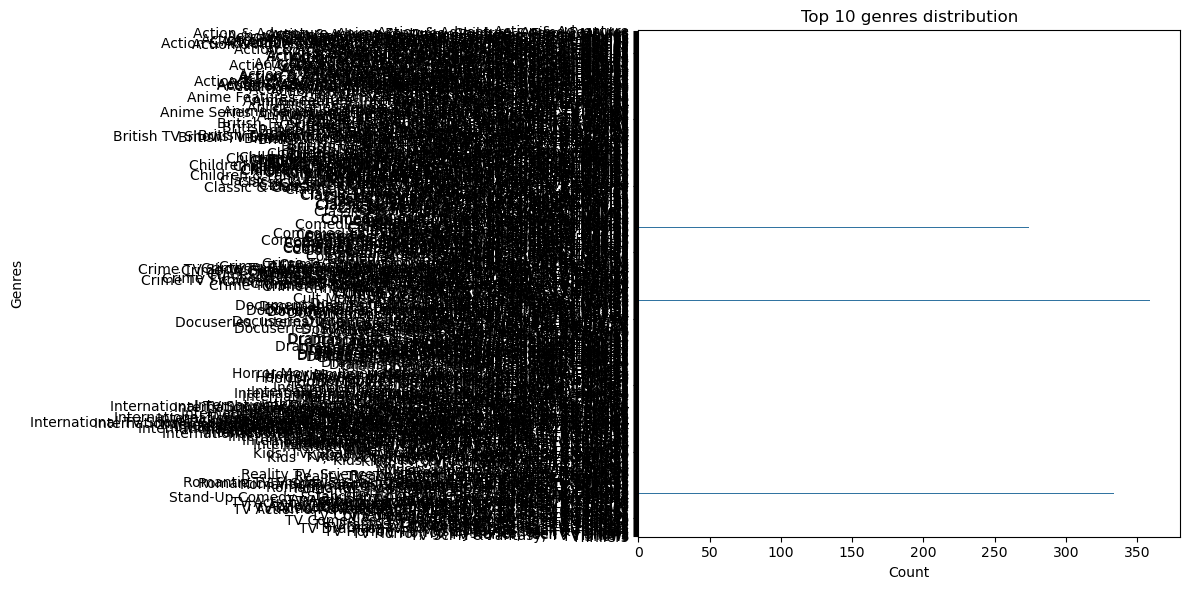

In [159]:
fig=plt.figure(figsize=(12,6))
sns.barplot(x=top_10_genres.values,y=top_10_genres.index)
plt.title('Top 10 genres distribution')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.tight_layout()
plt.show()

BIVARIATE ANALYSIS (Seaborn)

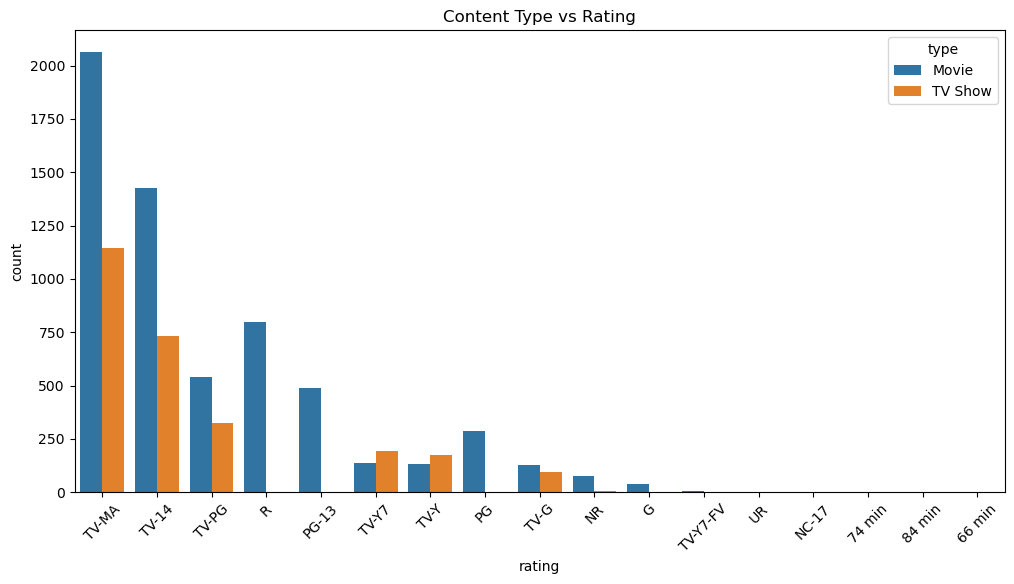

In [160]:
plt.figure(figsize=(12,6))
sns.countplot(data=netflix_data, x='rating', hue='type',
              order=netflix_data['rating'].value_counts().index)
plt.title('Content Type vs Rating')
plt.xticks(rotation=45)
plt.show()

Content Type vs Release Year


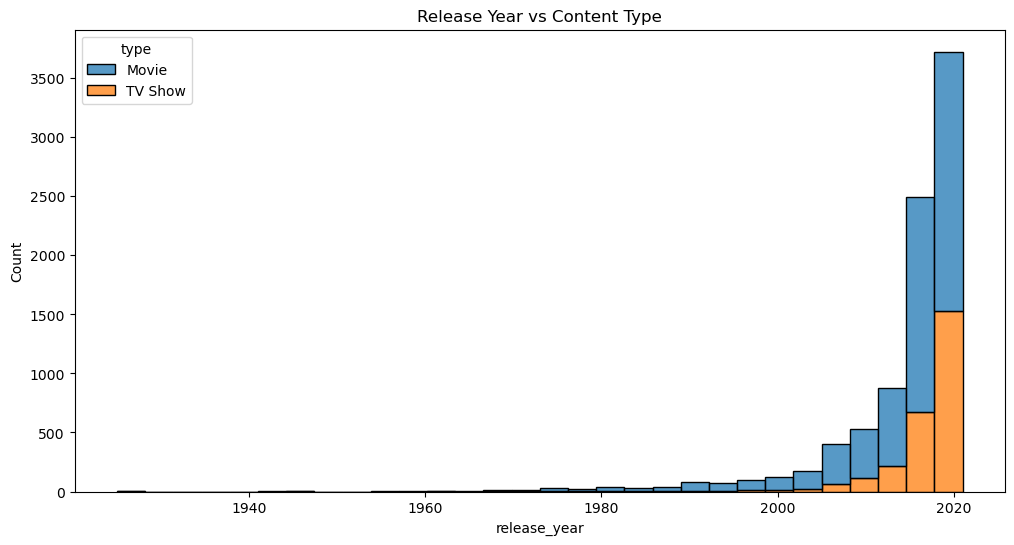

In [161]:
plt.figure(figsize=(12,6))
sns.histplot(data=netflix_data, x='release_year', hue='type',
             multiple='stack', bins=30)
plt.title('Release Year vs Content Type')
plt.show()

Country vs Content Type (Top 5 Countries)

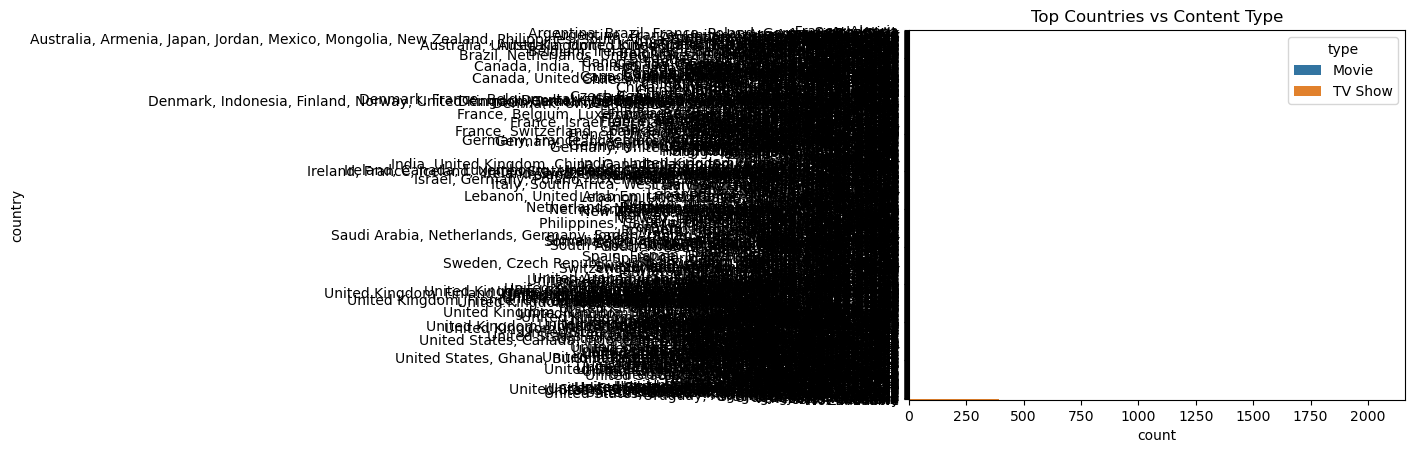

In [162]:
top_countries = netflix_data['country'].value_counts().head(5).index
df_country = netflix_data[netflix_data['country'].isin(top_countries)]

sns.countplot(data=df_country, y='country', hue='type')
plt.title('Top Countries vs Content Type')
plt.show()

Genre vs Rating (Heatmap)

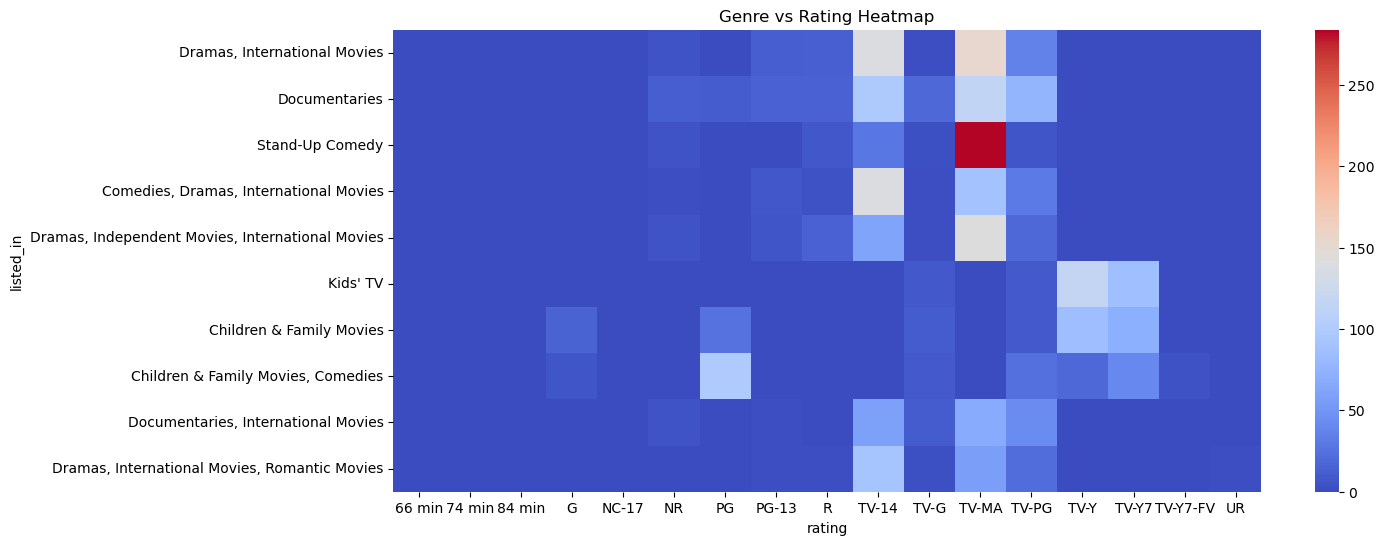

In [163]:
genre_rating = pd.crosstab(netflix_data['listed_in'], netflix_data['rating'])
top_genre_rating = genre_rating.loc[genre_rating.sum(axis=1).sort_values(ascending=False).head(10).index]

plt.figure(figsize=(14,6))
sns.heatmap(top_genre_rating, cmap='coolwarm')
plt.title('Genre vs Rating Heatmap')
plt.show()